In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv

In [3]:
data_set= "D:\STRESS DETECTION\WESAD\S2"
s2_data=  "D:\STRESS DETECTION\WESAD\S2\S2.pkl"

In [4]:
with open(s2_data, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [5]:
print(s2_data.keys())

dict_keys(['signal', 'label', 'subject'])


In [6]:
print(s2_data['subject'])
print('labels',(s2_data['label']))
print('Labels Datatype' , type(s2_data['label']))
print('Length of label' , len(s2_data['label']))
print('Unique values' ,np.unique(s2_data['label']))
print(len(s2_data['signal']))

S2
labels [0 0 0 ... 0 0 0]
Labels Datatype <class 'numpy.ndarray'>
Length of label 4255300
Unique values [0 1 2 3 4 6 7]
2


In [7]:
print(s2_data['signal'].keys())
print(s2_data['signal'].values())

dict_keys(['chest', 'wrist'])
dict_values([{'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
       [31.456268]], dtype=float32), 'Resp': array([[-1.14898682],
       

# LOADING DATA

In [8]:
chest_ax = s2_data['signal']['chest']['ACC'][0:,0]
chest_ay = s2_data['signal']['chest']['ACC'][0:,1]
chest_az = s2_data['signal']['chest']['ACC'][0:,2]
chest_ecg = s2_data['signal']['chest']['ECG'][:,0]
chest_emg = s2_data['signal']['chest']['EMG'][:,0]
chest_eda = s2_data['signal']['chest']['EDA'][:,0]
chest_temp = s2_data['signal']['chest']['Temp'][:,0]
chest_resp = s2_data['signal']['chest']['Resp'][:,0]

In [9]:
wrist_ax = s2_data['signal']['wrist']['ACC'][0:,0]
wrist_ay = s2_data['signal']['wrist']['ACC'][0:,1]
wrist_az = s2_data['signal']['wrist']['ACC'][0:,2]
wrist_bvp = s2_data['signal']['wrist']['BVP'][:,0]
wrist_eda = s2_data['signal']['wrist']['EDA'][:,0]
wrist_temp = s2_data['signal']['wrist']['TEMP'][:,0]

In [10]:
print(len(chest_ax)) 
print(len(chest_ay))
print(len(chest_az))
print(len(chest_ecg)) 
print(len(chest_emg))  
print(len(chest_eda)) 
print(len(chest_temp)) 
print(len(chest_resp))

4255300
4255300
4255300
4255300
4255300
4255300
4255300
4255300


<BarContainer object of 8 artists>

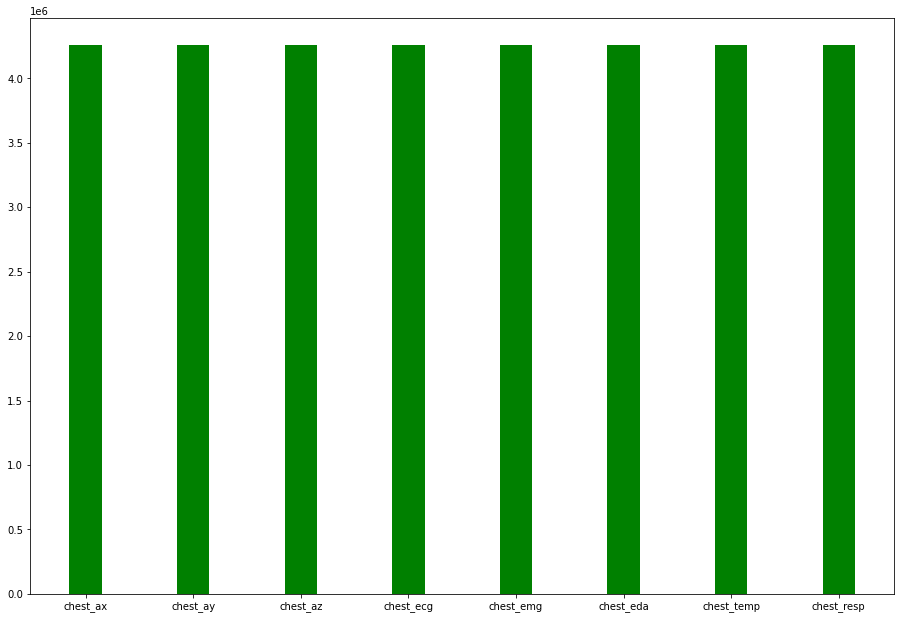

In [11]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
x_ax = ["chest_ax", "chest_ay", "chest_az","chest_ecg","chest_emg","chest_eda","chest_temp","chest_resp"]
y_ax = [len(chest_ax),len(chest_ay),len(chest_az),len(chest_ecg),len(chest_emg),len(chest_eda),len(chest_temp),len(chest_resp),]
ax.bar(x_ax,y_ax,color = 'g', width = 0.30)

In [12]:
print(len(wrist_ax))
print(len(wrist_ay))
print(len(wrist_az))
print(len(wrist_bvp))
print(len(wrist_eda))
print(len(wrist_temp))

194528
194528
194528
389056
24316
24316


<BarContainer object of 6 artists>

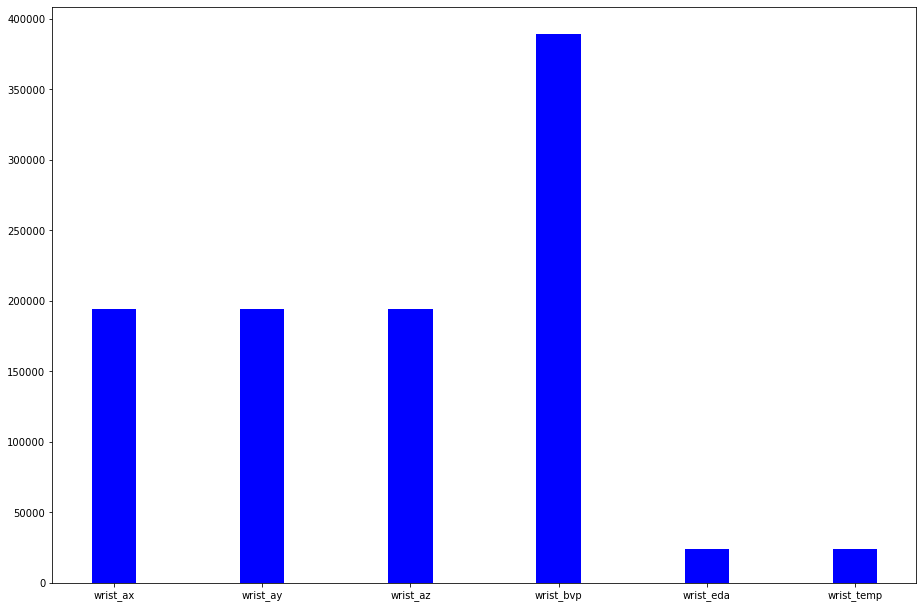

In [13]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["wrist_ax","wrist_ay","wrist_az","wrist_bvp","wrist_eda","wrist_temp",]
y_ax = [len(wrist_ax),len(wrist_ay),len(wrist_az),len(wrist_bvp),len(wrist_eda),len(wrist_temp)]
ax.bar(langs,y_ax,color = 'b', width = 0.30)

In [14]:
label=s2_data['label']

# labels

baseline_indices 800800
stress_indices 430500
amusement_indices 253400
meditation_indices 537599


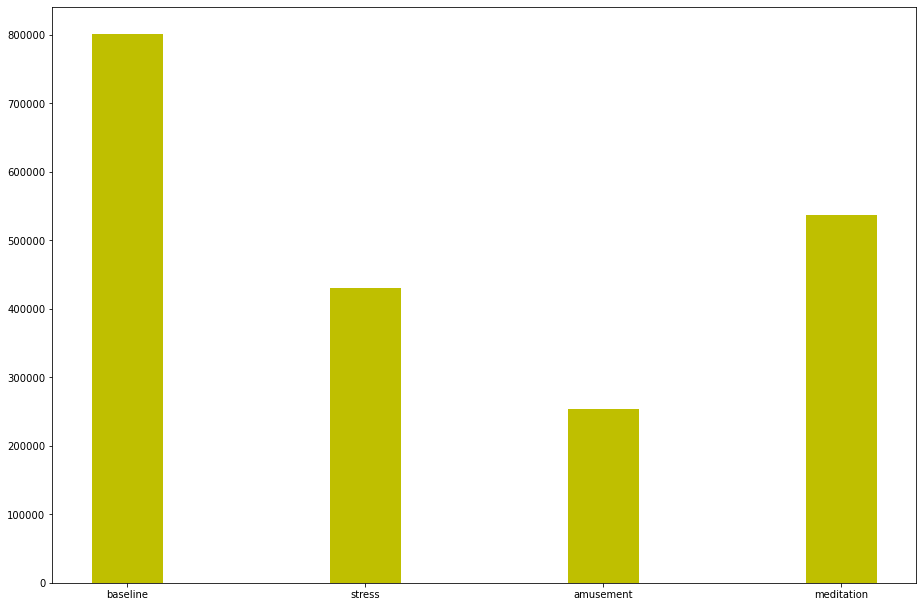

In [15]:
baseline_indices = np.nonzero(s2_data['label']==1)[0]
stress_indices = np.nonzero(s2_data['label']==2)[0]
amusement_indices = np.nonzero(s2_data['label']==3)[0]
meditation_indices = np.nonzero(s2_data['label']==4)[0]

print("baseline_indices", len(baseline_indices))
print("stress_indices", len(stress_indices))
print("amusement_indices", len(amusement_indices))
print("meditation_indices", len(meditation_indices))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["baseline", "stress", "amusement","meditation"]
y_ax = [len(baseline_indices),len(stress_indices),len(amusement_indices),len(meditation_indices)]
ax.bar(langs,y_ax,color = 'y', width = 0.30)
plt.show()

In [16]:
numpy_data=np.array([chest_ax,chest_ay,chest_az,chest_ecg,chest_emg,chest_eda,chest_temp,chest_resp,label]) 
numpy_data=numpy_data.T
df_chest = pd.DataFrame(data=numpy_data, columns=["chest_ax", "chest_ay", "chest_az","chest_ecg","chest_emg","chest_eda","chest_temp","chest_resp","label"]) 

print("chest data frame combined")

chest data frame combined


In [17]:
df_chest.to_csv('C:/Users/acer/Downloads/chest_data.csv')

In [18]:
df_chest.head()

,chest_ax,chest_ay,chest_az,chest_ecg,chest_emg,chest_eda,chest_temp,chest_resp,label
0,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987,0.0
1,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573,0.0
2,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039,0.0
3,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142,0.0
4,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130951,-1.161194,0.0


In [19]:
df_chest.describe()

,chest_ax,chest_ay,chest_az,chest_ecg,chest_emg,chest_eda,chest_temp,chest_resp,label
count,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06
mean,7.538656e-01,-1.331884e-01,-4.226812e-01,1.212245e-03,-2.412918e-03,1.528387e+00,3.087668e+01,5.490614e-02,1.212370e+00
std,1.751162e-01,6.417297e-02,3.002357e-01,1.540773e-01,1.165187e-02,1.238425e+00,1.281106e+00,2.917749e+00,1.606596e+00
min,2.150000e-01,-6.600000e-01,-1.135400e+00,-1.499542e+00,-4.149628e-01,2.632141e-01,2.804526e+01,-2.790375e+01,0.000000e+00
25%,6.210001e-01,-1.498000e-01,-7.172000e-01,-6.797791e-02,-8.331299e-03,7.995605e-01,3.057495e+01,-1.481628e+00,0.000000e+00
50%,8.568000e-01,-1.256000e-01,-3.222000e-01,8.239746e-03,-1.602173e-03,1.163101e+00,3.128992e+01,-1.571655e-01,0.000000e+00
75%,8.922000e-01,-9.579998e-02,-2.098000e-01,4.435730e-02,3.982544e-03,1.546478e+00,3.181512e+01,1.618958e+00,2.000000e+00
max,2.029800e+00,5.390000e-01,1.246800e+00,1.499313e+00,3.009796e-01,7.576752e+00,3.437039e+01,2.737885e+01,7.000000e+00


In [20]:
df_chest.shape

(4255300, 9)

In [21]:
df_chest.isnull().sum()

chest_ax      0
chest_ay      0
chest_az      0
chest_ecg     0
chest_emg     0
chest_eda     0
chest_temp    0
chest_resp    0
label         0
dtype: int64